<a href="https://colab.research.google.com/github/Priyabrat1103/Digit-Recognizer/blob/main/Digit_Recognizer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras

In [ ]:
(x_train, y_train), (x_test, y_test) =keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
# Training and testing shape of Input Data
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [ ]:
# Training and testing shape of Output Data
print(y_train.shape)
print(y_test.shape)

(60000,)
(10000,)


In [ ]:
# Training Images Count
import numpy as np
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
#Testing Image Count
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009]))

In [ ]:
# Before Normalization
print(x_train[0].max())
print(x_train[0].min())

255
0


In [ ]:
# Normalize : Scaling the value from 0 to 1
x_train = x_train/255
x_test = x_test/255

In [ ]:
# After Normalization
print(x_train[0].max())
print(x_train[0].min())

1.0
0.0


 NUERAL NETWORK ARCHITECTURE

In [ ]:
from keras.layers import Dense
from keras.layers import Flatten
model = keras.Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(392,activation ='relu'))
model.add(Dense(10,activation='softmax'))

COMPILATION


In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.summary()

In [ ]:
#Early Stopping Callback

from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(mode='min', verbose=1, patience=5)
history = model.fit(x_train,y_train,epochs=15,validation_split=0.1)

Epoch 1/15
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3772 - accuracy: 0.8910 - val_loss: 0.0969 - val_accuracy: 0.9723
Epoch 2/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0920 - accuracy: 0.9716 - val_loss: 0.0850 - val_accuracy: 0.9743
Epoch 3/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0684 - val_accuracy: 0.9798
Epoch 4/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0379 - accuracy: 0.9894 - val_loss: 0.0797 - val_accuracy: 0.9777
Epoch 5/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0303 - accuracy: 0.9911 - val_loss: 0.0711 - val_accuracy: 0.9815
Epoch 6/15
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.0714 - val_accuracy: 0.9807
Epoch 7/15
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0187 - accuracy: 0.9938 - val_loss: 0.0748 - val_accuracy:

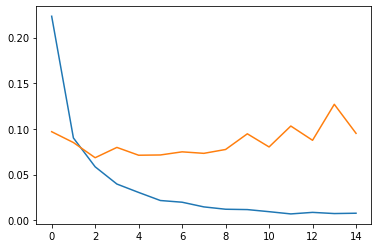

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [ ]:
# Evaluation of test data

import numpy as np

y_pred = model.predict(x_test)# Output will be in the form of probabilities
y_pred = np.argmax(y_pred,axis=1)
y_pred

array([7, 2, 1, ..., 4, 5, 6])

In [ ]:
a = np.array([11,44,66,77,33])
max_a = np.argmin(a)
max_a

0

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_pred,y_test)

array([[ 972,    0,    3,    0,    3,    2,    5,    1,    1,    4],
       [   1, 1125,    1,    0,    0,    0,    3,    2,    0,    2],
       [   0,    2, 1012,    2,    3,    0,    0,    9,    2,    0],
       [   0,    1,    5, 1000,    0,   11,    1,    3,    8,    9],
       [   0,    0,    2,    0,  954,    1,    2,    0,    0,    5],
       [   1,    1,    0,    3,    1,  872,    6,    0,    4,    2],
       [   2,    2,    2,    0,    5,    3,  939,    0,    0,    0],
       [   1,    1,    3,    2,    3,    0,    0, 1008,    3,    4],
       [   2,    3,    3,    3,    3,    3,    2,    2,  952,    1],
       [   1,    0,    1,    0,   10,    0,    0,    3,    4,  982]])

In [ ]:
accuracy_score(y_pred,y_test)*100

98.16

In [ ]:
model.save("digit_recognizer.hdf5")